In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

from tqdm import tqdm
import os 

tqdm.pandas()

# my Helper functions

from HelperFunctions import *

import xgboost as xgb 
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import yellowbrick.model_selection as ms

In [136]:
landsat_train_data = '../Datasets/landsat_features_more_bands_train.csv'
landsat_validation_data = '../Datasets/landsat_features_more_bands_validation.csv'


In [137]:
csv_training_files = ['../Datasets/landsat_features_more_bands_train.csv',
                          '../Datasets/terraclimate_features_more_bands_training.csv',
                          '../Datasets/nasa_precip_features_training.csv',
                          '../Datasets/soil_use_data_training.csv',
                          '../Datasets/nasa_terrain_features_training.csv',
                          '../Datasets/water_quality_training_dataset.csv']

target_columns = ['Total Alkalinity', 'Electrical Conductance', 'Dissolved Reactive Phosphorus']

drop_features = ['tmax', 'tmin', 'pct_urban', 'pct_water', 'pct_wetlands', 'pct_others', 'curvature', 'pet']
columns_to_drop_from_features = ["Latitude", "Longitude", "Sample Date"] + drop_features

dataHandler = DataOrganizer(target_columns)
dataHandler.load_training_data(csv_training_files, columns_to_drop_from_features)
#dataHandler.get_feature_columns()

In [ ]:

Feature_data, Target_data = dataHandler.get_training_dataset()


alkalinity_target = Target_data['Total Alkalinity']
electrical_target = Target_data['Electrical Conductance']
phosphorus_target = Target_data['Dissolved Reactive Phosphorus']



X_train_alkalinity, X_test_alkalinity, y_train_alkalinity, y_test_alkalinity = train_test_split(Feature_data, alkalinity_target, test_size=0.15)
X_train_electrical, X_test_electrical, y_train_electrical, y_test_electrical = train_test_split(Feature_data, electrical_target, test_size=0.15)
X_train_phosphorus, X_test_phosphorus, y_train_phosphorus, y_test_phosphorus = train_test_split(Feature_data, phosphorus_target, test_size=0.15)

X_train_alkalinity


,nir,green,swir16,swir22,coastal,blue,red,lwir11,NDMI,MNDWI,...,Chemical_Solubility,rain_7d_nasa,rain_3d_nasa,rain_12d_nasa,pct_agri,pct_natural,elevation,slope,month_sin,year_sin
5326,10358.0,8253.0,9190.0,8283.0,7316.0,7550.0,8090.5,44498.5,0.059750,-0.053718,...,18.925000,27.19,11.02,64.19,33.781362,64.153439,1354.0,5.550718,8.660254e-01,-0.587785
3105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.215000,0.42,0.00,0.91,19.211896,58.117853,983.0,0.000000,-5.000000e-01,0.951057
7959,17447.5,10032.5,15793.5,12627.5,8554.0,8874.0,10356.5,43488.0,0.049758,-0.223070,...,24.770000,14.02,13.55,23.49,41.045096,55.201903,137.0,3.438912,-8.660254e-01,0.587785
7767,16670.5,9914.0,14452.5,11829.0,8140.0,8658.0,10080.5,45864.0,0.071266,-0.186260,...,27.640000,1.75,0.20,7.42,0.331288,90.766421,280.0,1.350224,8.660254e-01,-0.951057
547,12887.0,10271.5,12497.5,10760.5,NaN,9411.5,10763.0,NaN,0.015344,-0.097765,...,23.800000,0.60,0.08,1.09,15.183905,57.100188,534.0,6.017285,5.000000e-01,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,29764.0,65535.0,46934.0,26873.5,NaN,65535.0,65535.0,NaN,-0.223865,0.165388,...,27.129997,0.08,0.05,1.77,0.335535,70.632207,422.0,0.954841,1.000000e+00,0.000000
2278,12868.5,9539.0,14458.0,11762.5,NaN,8814.0,10139.0,NaN,-0.058167,-0.204984,...,22.605000,0.00,0.00,0.00,9.525943,78.144735,1251.0,2.134300,1.224647e-16,0.951057
9037,12439.5,9740.0,15344.0,14068.5,NaN,9018.0,10324.0,NaN,-0.104540,-0.223409,...,23.724998,12.49,0.08,13.47,41.495891,57.240545,1210.0,3.016961,-8.660254e-01,-0.951057
8402,14549.5,9855.0,12703.0,10650.5,NaN,9045.5,10271.5,NaN,0.067755,-0.126252,...,23.935000,1.48,0.31,3.50,15.058030,23.939665,97.0,2.134300,8.660254e-01,-0.951057


## Feature Importance

In [138]:
model_params = {
    'objective' :'reg:squarederror',
    'booster':'dart',
    'learning_rate' : 0.05, # bom
    'max_depth' : 3, # bom, muda comforme adicionar dados 
    'n_estimators' : 80, # bom, muda conforme adicionar dados
    'subsample' : 0.6,
    'colsample_bytree' : 0.5,
    'min_child_weight' : 30.0, ## fixado assim, bom
    'gamma' : 1.5,  ## fixado assim, bom
    'verbosity' : 1,
    'rate_drop' : 0.25, # bom : 0.25
    'skip_drop' : 0.5, # bom : 0.5
    
    'reg_lambda' : 15.0,                # L2 >= 0
    'reg_alpha' : 9.0,
}

dart_xgb_alcalinity= xgb.XGBRegressor(**model_params)

dart_xgb_electrical= xgb.XGBRegressor(**model_params)


dart_xgb_phosphorus= xgb.XGBRegressor(**model_params)

# parametros treino:


In [139]:

dart_xgb_alcalinity.fit(X_train_alkalinity, y_train_alkalinity,
            eval_set=[(X_test_alkalinity, y_test_alkalinity)])

dart_xgb_electrical.fit(X_train_electrical, y_train_electrical,
            eval_set=[(X_test_electrical, y_test_electrical)])

dart_xgb_phosphorus.fit(X_train_phosphorus, y_train_phosphorus,
            eval_set=[(X_test_phosphorus, y_test_phosphorus)])

[0]	validation_0-rmse:73.44369
[1]	validation_0-rmse:72.55091
[2]	validation_0-rmse:71.45155
[3]	validation_0-rmse:70.30933
[4]	validation_0-rmse:69.67783
[5]	validation_0-rmse:68.70890
[6]	validation_0-rmse:67.80152
[7]	validation_0-rmse:67.45330
[8]	validation_0-rmse:66.64610
[9]	validation_0-rmse:65.82099
[10]	validation_0-rmse:65.12403
[11]	validation_0-rmse:64.35228
[12]	validation_0-rmse:63.74687
[13]	validation_0-rmse:62.98176
[14]	validation_0-rmse:62.35762
[15]	validation_0-rmse:61.83248
[16]	validation_0-rmse:61.38263
[17]	validation_0-rmse:61.29211
[18]	validation_0-rmse:61.21732
[19]	validation_0-rmse:61.07570
[20]	validation_0-rmse:60.58840
[21]	validation_0-rmse:60.52384
[22]	validation_0-rmse:60.46699
[23]	validation_0-rmse:60.37598
[24]	validation_0-rmse:60.31742
[25]	validation_0-rmse:59.69117
[26]	validation_0-rmse:59.63287
[27]	validation_0-rmse:59.60319
[28]	validation_0-rmse:58.99370
[29]	validation_0-rmse:58.85379
[30]	validation_0-rmse:58.47881
[31]	validation_0-

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,'dart'
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.5
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabete

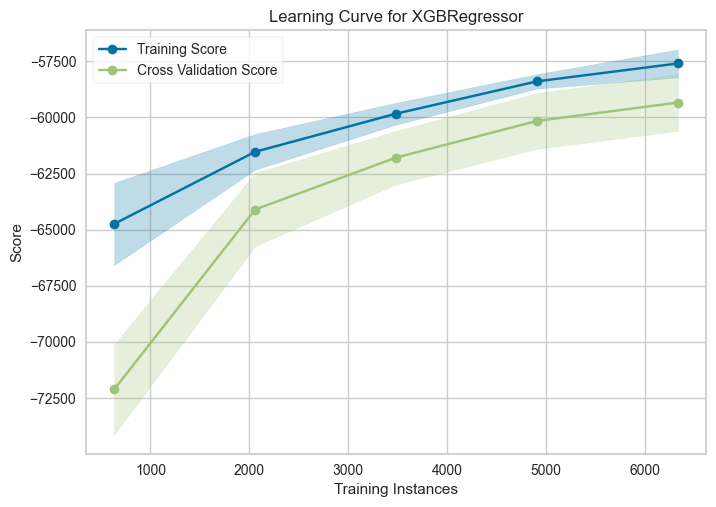

In [140]:
_ = ms.learning_curve(dart_xgb_electrical, X_train_electrical, y_train_electrical, scoring='neg_mean_squared_error', cv=5)

<Axes: >

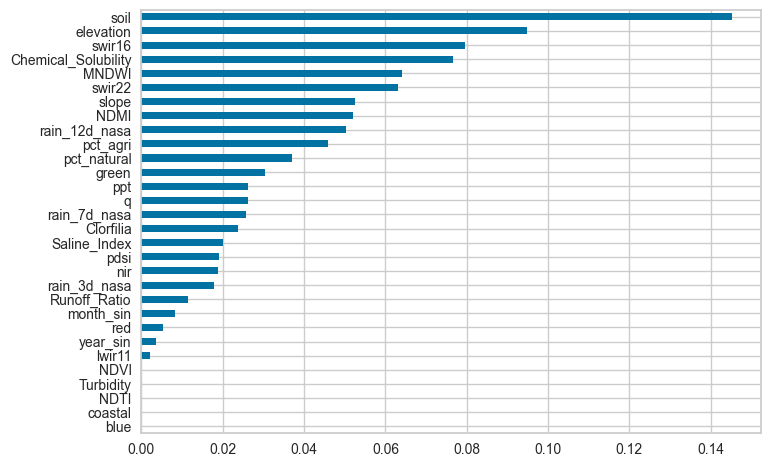

In [141]:
(pd.Series(dart_xgb_alcalinity.feature_importances_, index = X_train_alkalinity.columns).sort_values().plot.barh())


<Axes: >

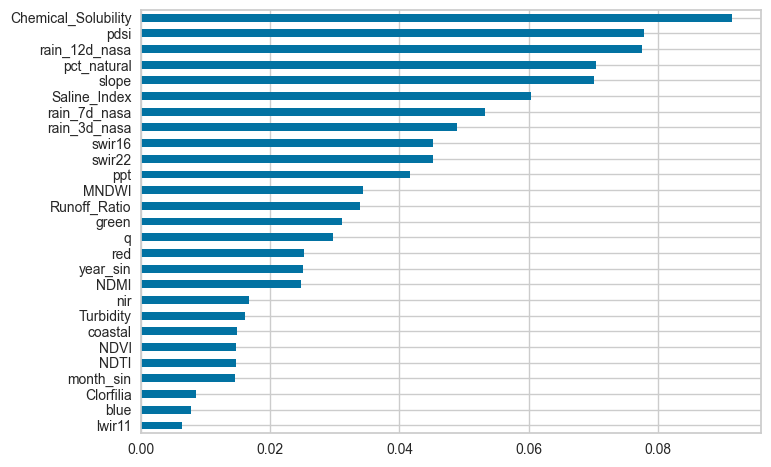

In [123]:

(pd.Series(dart_xgb_electrical.feature_importances_, index = X_train_electrical.columns).sort_values().plot.barh())


<Axes: >

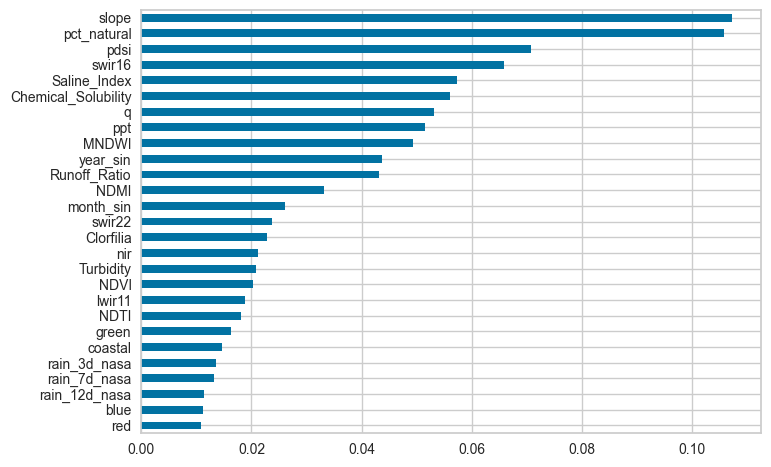

In [124]:

(pd.Series(dart_xgb_phosphorus.feature_importances_, index = X_train_phosphorus.columns).sort_values().plot.barh())

In [125]:
#make the print in green
print("\033[92mavaliando fosforo\033[0m")
evaluate_model(dart_xgb_phosphorus.predict(X_train_phosphorus), y_train_phosphorus, "train evaluation")
evaluate_model(dart_xgb_phosphorus.predict(X_test_phosphorus), y_test_phosphorus, "test evaluation")

print()
print("\033[92mavaliando alcalinidade\033[0m")
evaluate_model(dart_xgb_alcalinity.predict(X_train_alkalinity), y_train_alkalinity, "train evaluation")
evaluate_model(dart_xgb_alcalinity.predict(X_test_alkalinity), y_test_alkalinity, "test evaluation")

print()
print("\033[92mavaliando condutividade eletrica\033[0m")
evaluate_model(dart_xgb_electrical.predict(X_train_electrical), y_train_electrical, "train evaluation")
evaluate_model(dart_xgb_electrical.predict(X_test_electrical), y_test_electrical, "test evaluation")

avaliando fosforo

train evaluation Evaluation:
R²: 0.479
RMSE: 36.654

test evaluation Evaluation:
R²: 0.481
RMSE: 37.406

avaliando alcalinidade

train evaluation Evaluation:
R²: 0.562
RMSE: 49.613

test evaluation Evaluation:
R²: 0.521
RMSE: 50.752

avaliando condutividade eletrica

train evaluation Evaluation:
R²: 0.552
RMSE: 228.760

test evaluation Evaluation:
R²: 0.506
RMSE: 240.273


(array([521.82104, 343.84277, 646.4847 , ..., 585.505  , 414.3892 ,
        679.7444 ], dtype=float32),
 0.5058508873748793,
 np.float64(240.2727732309928))

## Submission

In [126]:
submission_csv_files = ['../Datasets/landsat_features_more_bands_validation.csv',
                          '../Datasets/terraclimate_features_more_bands_validation.csv',
                          '../Datasets/nasa_precip_features_validation.csv',
                          '../Datasets/soil_use_data_validation.csv',
                          '../Datasets/nasa_terrain_features_validation.csv']

dataHandler.load_submission_data(submission_csv_files)
all_submission_data = dataHandler.get_submission_dataset()

In [127]:

X_pred_input_features = all_submission_data

y_submission_pred_alkalinity = dart_xgb_alcalinity.predict(X_pred_input_features)
y_submission_pred_electrical = dart_xgb_electrical.predict(X_pred_input_features)
y_submission_pred_phosphorus = dart_xgb_phosphorus.predict(X_pred_input_features)

predicted_values_dict = {
    'Total Alkalinity': y_submission_pred_alkalinity, 
    'Electrical Conductance': y_submission_pred_electrical, 
    'Dissolved Reactive Phosphorus': y_submission_pred_phosphorus
}


predicted_pd_final = dataHandler.build_get_submission_dataset(predicted_values_dict)

predicted_pd_final.to_csv("../Results/submission_predictions_boosted_more_data.csv", index=False)
